In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

# Create a date range for the entire year (365 days, 24 hours per day)
date_range = pd.date_range(start='2023-01-01', end='2023-12-31', freq='h')

# Initialize an empty DataFrame
tariff_df = pd.DataFrame({'DateTime': date_range})

# Extract date and hour from the DateTime column
tariff_df['Date'] = tariff_df['DateTime'].dt.date
tariff_df['Hour'] = tariff_df['DateTime'].dt.hour

# Create time slot ranges
tariff_df['Time_Slot'] = tariff_df.apply(lambda row: f"{row['Hour']:02d}:00 - {row['Hour'] + 1:02d}:00", axis=1)

# Create conditions for assigning tariff types based on time slots (hours)
def assign_tariff_type(hour):
    if 6 <= hour < 9 or 18 <= hour < 21:
        return 'Peak'
    elif 9 <= hour < 18 or 21 <= hour < 23:
        return 'Mid-Peak'
    else:
        return 'Off-Peak'

tariff_df['Tariff_Type'] = tariff_df['Hour'].apply(assign_tariff_type)

# Set baseline tariff rates for each category (these values are just examples and can be adjusted)
tariff_rates = {
    'Peak': 0.30,      # Higher rate during peak times
    'Mid-Peak': 0.20,  # Moderate rate during mid-peak times
    'Off-Peak': 0.10   # Lower rate during off-peak times
}

# Assign tariff rates based on the tariff type
tariff_df['Tariff_Rate'] = tariff_df['Tariff_Type'].map(tariff_rates)

# Introduce seasonal variations in tariff rates (adjust values based on seasons)
def adjust_for_season(date, rate):
    month = date.month
    # Higher tariffs in summer (June-August)
    if month in [6, 7, 8]:
        return rate * 1.2  # 20% higher in summer
    # Slightly higher tariffs in winter (December-February)
    elif month in [12, 1, 2]:
        return rate * 1.1  # 10% higher in winter
    else:
        return rate  # No adjustment for rainy season

# Apply seasonal adjustments to the rates
tariff_df['Tariff_Rate'] = tariff_df.apply(lambda row: adjust_for_season(row['DateTime'], row['Tariff_Rate']), axis=1)

# Introduce random fluctuations around the adjusted tariff rates
def adjust_tariff_rate(base_rate):
    # Introduce a random fluctuation of +/- 10%
    fluctuation = base_rate * random.uniform(-0.1, 0.1)
    return round(base_rate + fluctuation, 2)

# Assign adjusted tariff rates with fluctuations
tariff_df['Adjusted_Tariff_Rate'] = tariff_df['Tariff_Rate'].apply(adjust_tariff_rate)

# Drop the 'Hour' column as it's no longer needed
tariff_df.drop(columns=['Hour'], inplace=True)

# Display the first few rows of the dummy tariff data
print(tariff_df.head(24))  # Showing first 24 hours (one full day)


              DateTime        Date      Time_Slot Tariff_Type  Tariff_Rate  \
0  2023-01-01 00:00:00  2023-01-01  00:00 - 01:00    Off-Peak         0.11   
1  2023-01-01 01:00:00  2023-01-01  01:00 - 02:00    Off-Peak         0.11   
2  2023-01-01 02:00:00  2023-01-01  02:00 - 03:00    Off-Peak         0.11   
3  2023-01-01 03:00:00  2023-01-01  03:00 - 04:00    Off-Peak         0.11   
4  2023-01-01 04:00:00  2023-01-01  04:00 - 05:00    Off-Peak         0.11   
5  2023-01-01 05:00:00  2023-01-01  05:00 - 06:00    Off-Peak         0.11   
6  2023-01-01 06:00:00  2023-01-01  06:00 - 07:00        Peak         0.33   
7  2023-01-01 07:00:00  2023-01-01  07:00 - 08:00        Peak         0.33   
8  2023-01-01 08:00:00  2023-01-01  08:00 - 09:00        Peak         0.33   
9  2023-01-01 09:00:00  2023-01-01  09:00 - 10:00    Mid-Peak         0.22   
10 2023-01-01 10:00:00  2023-01-01  10:00 - 11:00    Mid-Peak         0.22   
11 2023-01-01 11:00:00  2023-01-01  11:00 - 12:00    Mid-Peak   

In [2]:
file_path = '/Users/rishithagantyala/Desktop/LUMINIOUS/DUMMY.xlsx' 


In [4]:
with pd.ExcelWriter(file_path, engine='openpyxl', mode='a') as writer:
    tariff_df.to_excel(writer, index=False, sheet_name='Tariff')

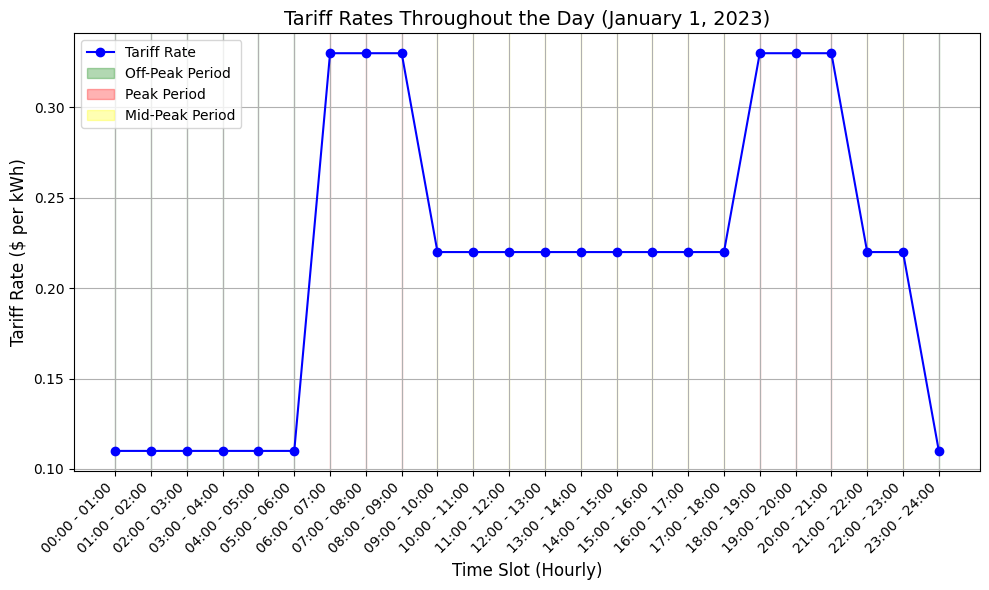

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Create data for a single day (24 hours) from the tariff DataFrame
one_day_data = tariff_df[tariff_df['Date'] == pd.Timestamp('2023-01-01').date()]

# Plot the tariff rates across the hours of the day
plt.figure(figsize=(10, 6))
plt.plot(one_day_data['Time_Slot'], one_day_data['Tariff_Rate'], marker='o', linestyle='-', color='b', label='Tariff Rate')

# Add labels and title
plt.title('Tariff Rates Throughout the Day (January 1, 2023)', fontsize=14)
plt.xlabel('Time Slot (Hourly)', fontsize=12)
plt.ylabel('Tariff Rate ($ per kWh)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True)

# Highlight Peak, Mid-Peak, and Off-Peak periods with different colors
for i, row in one_day_data.iterrows():
    if row['Tariff_Type'] == 'Peak':
        plt.axvspan(row['Time_Slot'], row['Time_Slot'], color='red', alpha=0.3, label='Peak Period' if 'Peak Period' not in plt.gca().get_legend_handles_labels()[1] else None)
    elif row['Tariff_Type'] == 'Mid-Peak':
        plt.axvspan(row['Time_Slot'], row['Time_Slot'], color='yellow', alpha=0.3, label='Mid-Peak Period' if 'Mid-Peak Period' not in plt.gca().get_legend_handles_labels()[1] else None)
    else:
        plt.axvspan(row['Time_Slot'], row['Time_Slot'], color='green', alpha=0.3, label='Off-Peak Period' if 'Off-Peak Period' not in plt.gca().get_legend_handles_labels()[1] else None)

# Add a legend
plt.legend()

# Display the graph
plt.tight_layout()
plt.show()


In [6]:
import pandas as pd
import numpy as np
import random

# Define date range for the entire year (2023)
date_range = pd.date_range(start='2023-01-01', end='2023-12-31', freq='h')  # Hourly data

# Function to assign season based on month
def get_season(date):
    month = date.month
    if month in [6, 7, 8]:  # Summer (June, July, August)
        return 'Summer'
    elif month in [9, 10, 11]:  # Rainy (September, October, November)
        return 'Rainy'
    else:  # Winter (December to May)
        return 'Winter'

# Function to simulate realistic energy consumption based on season and time of day
def generate_energy_consumption(season, hour):
    if season == 'Summer':
        if 7 <= hour <= 9 or 18 <= hour <= 21:  # Peak hours in summer
            return random.uniform(3.5, 5.0)  # Higher consumption (kWh)
        else:
            return random.uniform(1.5, 3.0)  # Off-peak in summer
    elif season == 'Rainy':
        if 7 <= hour <= 9 or 18 <= hour <= 21:  # Peak hours in rainy season
            return random.uniform(2.5, 4.0)  # Medium-high consumption
        else:
            return random.uniform(1.2, 2.5)  # Off-peak in rainy season
    else:  # Winter
        if 7 <= hour <= 9 or 18 <= hour <= 21:  # Peak hours in winter
            return random.uniform(2.0, 3.5)  # Moderate consumption
        else:
            return random.uniform(1.0, 2.0)  # Lower consumption in winter

# Create the DataFrame
data = {
    'Date': date_range.date,  # Assign date
    'Time_Slot': [f"{hour:02d}:00 - {hour + 1:02d}:00" for hour in date_range.hour],  # Hourly time slot formatted
    'Season': [get_season(d) for d in date_range],  # Determine the season for each date
    'Energy_Consumption': [generate_energy_consumption(get_season(d), d.hour) for d in date_range]  # Energy consumption based on season and time slot
}

energy_df = pd.DataFrame(data)

# Display the first few rows of the data
print(energy_df.head(10))



         Date      Time_Slot  Season  Energy_Consumption
0  2023-01-01  00:00 - 01:00  Winter            1.795138
1  2023-01-01  01:00 - 02:00  Winter            1.242557
2  2023-01-01  02:00 - 03:00  Winter            1.333522
3  2023-01-01  03:00 - 04:00  Winter            1.864385
4  2023-01-01  04:00 - 05:00  Winter            1.627479
5  2023-01-01  05:00 - 06:00  Winter            1.401285
6  2023-01-01  06:00 - 07:00  Winter            1.526549
7  2023-01-01  07:00 - 08:00  Winter            2.972360
8  2023-01-01  08:00 - 09:00  Winter            2.228055
9  2023-01-01  09:00 - 10:00  Winter            2.663654


In [8]:
with pd.ExcelWriter(file_path, engine='openpyxl', mode='a') as writer:
    energy_df.to_excel(writer, index=False, sheet_name='Energy')

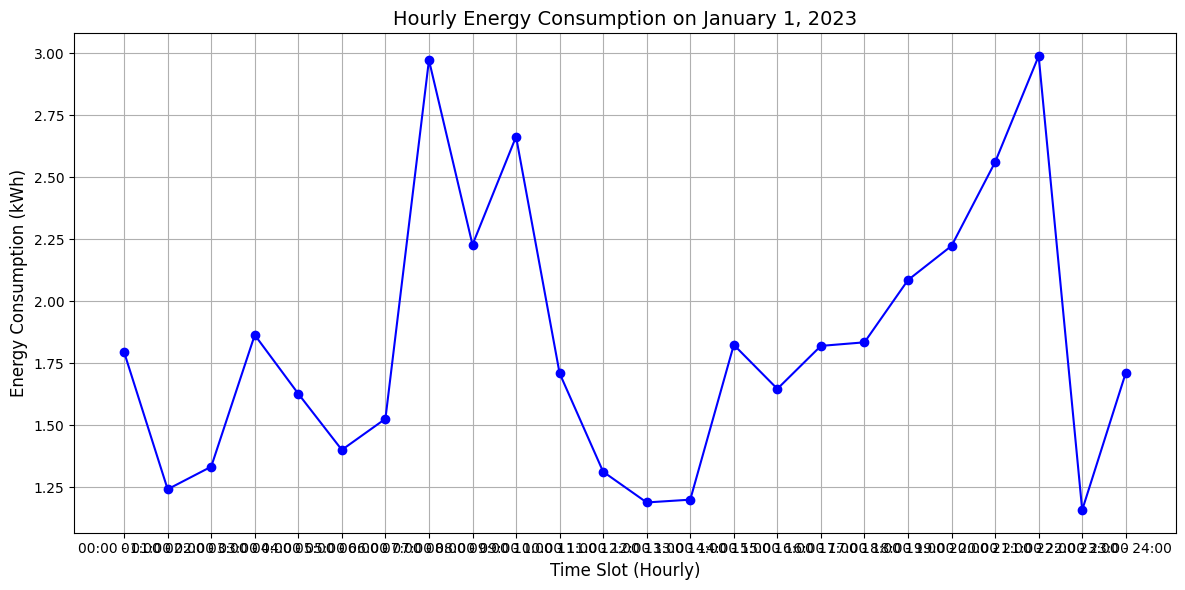

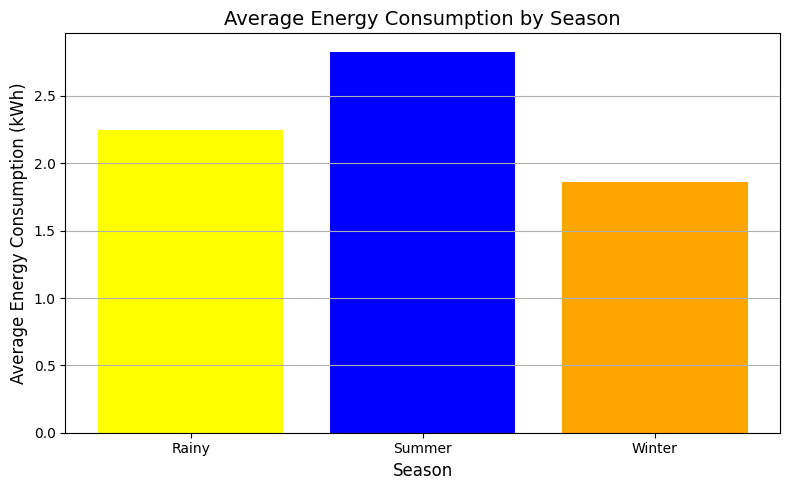

In [9]:
import matplotlib.pyplot as plt

# 1. Hourly Energy Consumption Plot for January 1, 2023
# Filter data for a specific day
one_day_energy = energy_df[energy_df['Date'] == pd.Timestamp('2023-01-01').date()]

# Plot the hourly energy consumption
plt.figure(figsize=(12, 6))
plt.plot(one_day_energy['Time_Slot'], one_day_energy['Energy_Consumption'], marker='o', linestyle='-', color='blue')

# Add labels and title
plt.title('Hourly Energy Consumption on January 1, 2023', fontsize=14)
plt.xlabel('Time Slot (Hourly)', fontsize=12)
plt.ylabel('Energy Consumption (kWh)', fontsize=12)
plt.xticks(range(0, 24))  # Set x-ticks for each hour
plt.grid()

# Display the graph
plt.tight_layout()
plt.show()

# 2. Seasonal Energy Consumption Plot
# Calculate average energy consumption by season
seasonal_average = energy_df.groupby('Season')['Energy_Consumption'].mean().reset_index()

# Plot the seasonal energy consumption
plt.figure(figsize=(8, 5))
plt.bar(seasonal_average['Season'], seasonal_average['Energy_Consumption'], color=['yellow', 'blue', 'orange'])

# Add labels and title
plt.title('Average Energy Consumption by Season', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Energy Consumption (kWh)', fontsize=12)
plt.grid(axis='y')

# Display the graph
plt.tight_layout()
plt.show()


In [10]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Generate a date range for the entire year 2023
date_range = pd.date_range(start='2023-01-01', end='2023-12-31', freq='h')

# Function to determine the season based on the date
def get_season(date):
    if date.month in [12, 1, 2]:  # Winter
        return 'Winter'
    elif date.month in [3, 4, 5]:  # Spring
        return 'Spring'
    elif date.month in [6, 7, 8]:  # Summer
        return 'Summer'
    else:  # Autumn
        return 'Rainy'

# Function to simulate realistic solar energy production based on season and time of day
def generate_solar_production(season, hour):
    if season == 'Summer':
        if 10 <= hour <= 16:  # Peak hours for solar production
            return random.uniform(5.0, 7.5)  # Higher production (kWh)
        else:
            return random.uniform(0.5, 2.0)  # Off-peak in summer
    elif season == 'Rainy':
        if 10 <= hour <= 16:  # Peak hours for solar production
            return random.uniform(2.0, 4.0)  # Moderate production
        else:
            return random.uniform(0.0, 1.0)  # Off-peak in rainy season
    else:  # Winter
        if 10 <= hour <= 16:  # Peak hours for solar production
            return random.uniform(1.0, 3.0)  # Lower production
        else:
            return 0.0  # No production at night

# Create the solar energy production DataFrame
solar_data = {
    'Date': date_range.date,  # Assign date
    'Time_Slot': [f"{d.hour:02d}:00 - {d.hour + 1:02d}:00" for d in date_range],  # Hourly time slot formatted
    'Season': [get_season(d) for d in date_range],  # Determine the season for each date
    'Solar_Energy_Production': [generate_solar_production(get_season(d), d.hour) for d in date_range]  # Solar production based on season and time slot
}

solar_df = pd.DataFrame(solar_data)

# Display the first few rows of the solar data
print(solar_df)



            Date      Time_Slot  Season  Solar_Energy_Production
0     2023-01-01  00:00 - 01:00  Winter                      0.0
1     2023-01-01  01:00 - 02:00  Winter                      0.0
2     2023-01-01  02:00 - 03:00  Winter                      0.0
3     2023-01-01  03:00 - 04:00  Winter                      0.0
4     2023-01-01  04:00 - 05:00  Winter                      0.0
...          ...            ...     ...                      ...
8732  2023-12-30  20:00 - 21:00  Winter                      0.0
8733  2023-12-30  21:00 - 22:00  Winter                      0.0
8734  2023-12-30  22:00 - 23:00  Winter                      0.0
8735  2023-12-30  23:00 - 24:00  Winter                      0.0
8736  2023-12-31  00:00 - 01:00  Winter                      0.0

[8737 rows x 4 columns]


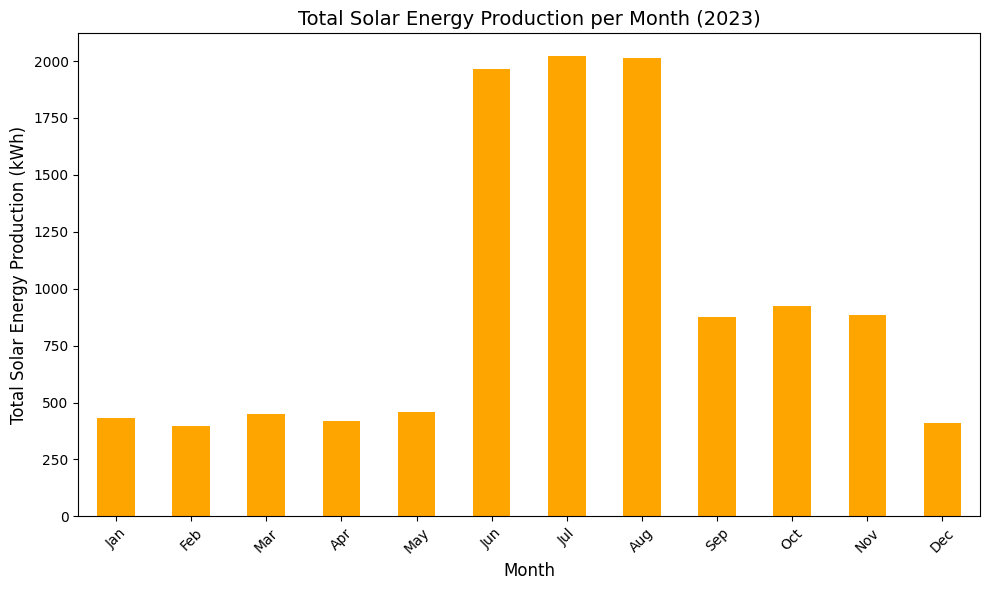

In [11]:
import matplotlib.pyplot as plt

# Convert 'Date' column back to datetime for grouping by month
solar_df['Date'] = pd.to_datetime(solar_df['Date'])

# Group by month and calculate the total solar energy production per month
solar_df['Month'] = solar_df['Date'].dt.month
monthly_solar_production = solar_df.groupby('Month')['Solar_Energy_Production'].sum()

# Plotting solar energy production per month
plt.figure(figsize=(10, 6))
monthly_solar_production.plot(kind='bar', color='orange')

# Customizing the plot
plt.title('Total Solar Energy Production per Month (2023)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Solar Energy Production (kWh)', fontsize=12)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


In [12]:
with pd.ExcelWriter(file_path, engine='openpyxl', mode='a') as writer:
    solar_df.to_excel(writer, index=False, sheet_name='Solar')

In [13]:
import pandas as pd
import random
import pickle

# Your code to generate tariff data
# (Use your existing code for generating tariff_df)

# Set the pickle file path
pickle_file_path = '/Users/rishithagantyala/Desktop/LUMINIOUS/rishitha/tariff_data.pkl'

# Save the tariff data as a pickle file
with open(pickle_file_path, 'wb') as f:
    pickle.dump(tariff_df, f)

print(f"Tariff data saved at: {pickle_file_path}")


Tariff data saved at: /Users/rishithagantyala/Desktop/LUMINIOUS/rishitha/tariff_data.pkl


In [14]:
import pandas as pd
import random
import pickle

# Your code to generate energy consumption data
# (Use your existing code for generating energy_df)

# Set the pickle file path
pickle_file_path = '/Users/rishithagantyala/Desktop/LUMINIOUS/rishitha/energy_data.pkl'

# Save the energy consumption data as a pickle file
with open(pickle_file_path, 'wb') as f:
    pickle.dump(energy_df, f)

print(f"Energy data saved at: {pickle_file_path}")


Energy data saved at: /Users/rishithagantyala/Desktop/LUMINIOUS/rishitha/energy_data.pkl


In [15]:
import pandas as pd
import random
import pickle

# Your code to generate solar data
# (Use your existing code for generating solar_df)

# Set the pickle file path
pickle_file_path = '/Users/rishithagantyala/Desktop/LUMINIOUS/rishitha/solar_data.pkl'

# Save the solar data as a pickle file
with open(pickle_file_path, 'wb') as f:
    pickle.dump(solar_df, f)

print(f"Solar data saved at: {pickle_file_path}")


Solar data saved at: /Users/rishithagantyala/Desktop/LUMINIOUS/rishitha/solar_data.pkl
